In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from PIL import Image as pil_image
from keras.applications.vgg16 import VGG16
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os, shutil, glob, os.path
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import torch

In [ ]:
image.LOAD_TRUNCATED_IMAGES = True
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
imdir = '/content/data'
targetdir = r"/content/gdrive/MyDrive/final_hw/result"

In [ ]:
filelist = glob.glob(os.path.join(imdir, '*.png'))
# filelist.sort()
featurelist = []


In [ ]:
for i, imagepath in enumerate(filelist):
    print("    Status: %s / %s" %(i, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

In [ ]:
n_digits=10

pca = PCA(n_components=n_digits).fit_transform(featurelist)

In [ ]:
number_clusters=27

kmeans = KMeans(n_clusters=number_clusters, random_state=0)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=27, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
n_digits=10

pca = PCA(n_components=n_digits).fit_transform(featurelist)

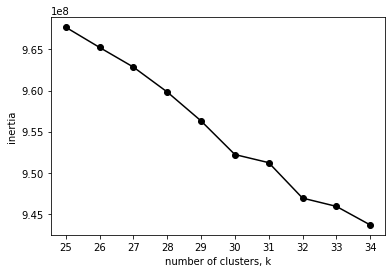

In [ ]:
ks = range(25, 35)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=0).fit(np.array(featurelist))
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
n_digits=2

pca = PCA(n_components=n_digits).fit_transform(featurelist)

In [ ]:
number_clusters=34

kmeans = KMeans(n_clusters=number_clusters, random_state=0)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=34, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
label = kmeans.fit_predict(pca)

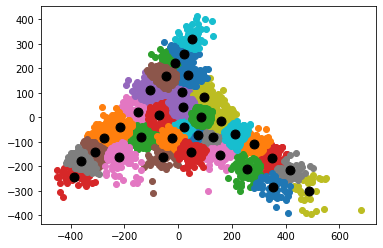

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:

for i in u_labels:
    plt.scatter(pca[label == i , 0] , pca[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = "k")
fig = plt.figure(figsize=(20,20))
plt.show()


In [ ]:
n_digits=3

tri = PCA(n_components=n_digits).fit_transform(featurelist)

In [ ]:
list1 = label.tolist()
list2 = [[int(item) for item in list1]]
label = np.array(list2)

In [ ]:
d3=np.concatenate((tri, label.T), axis=1)

In [ ]:
np.savetxt('data.csv', d3, delimiter=',')

In [ ]:
d3 = d3[0:2000]
label = label[0:2000]

In [ ]:
list1 = label.tolist()

In [ ]:
list1=label[0]
list1 = list1.tolist()

array([ 3, 19, 21, ..., 27,  3, 23])

In [ ]:
import plotly.graph_objects as go


# Helix equation
t = np.linspace(0, 20, 100)
x, y, z = d3[:,0], d3[:,1], d3[:,2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=list1,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.7
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()